## Matplotlib 简介

## 使用 Pyplot

导入相关的包：

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## plt.show() 函数

在 `ipython` 命令行中，我们可以使用 `magic` 命令将它插入 `notebook` 中，并且不需要调用 `plt.show()` 也可以显示：

- `%matplotlib notebook`
- `%matplotlib inline`

不过在实际写程序中，我们还是需要调用 `plt.show()` 函数将图像显示出来。

这里我们使图像输出在 `notebook` 中：

In [6]:
%matplotlib inline

### 字符参数

和 **`MATLAB`** 中类似，我们还可以用字符来指定绘图的格式：

表示颜色的字符参数有：

字符 | 颜色
-- | -- 
`‘b’`|	蓝色，blue
`‘g’`|	绿色，green
`‘r’`|	红色，red
`‘c’`|	青色，cyan
`‘m’`|	品红，magenta
`‘y’`|	黄色，yellow
`‘k’`|	黑色，black
`‘w’`|	白色，white

表示类型的字符参数有：

字符|类型 | 字符|类型
---|--- | --- | ---
`  '-'	`| 实线 | `'--'`|	虚线
`'-.'`|	虚点线 | `':'`|	点线
`'.'`|	点 | `','`| 像素点
`'o'`	|圆点 | `'v'`|	下三角点
`'^'`|	上三角点 | `'<'`|	左三角点
`'>'`|	右三角点 | `'1'`|	下三叉点
`'2'`|	上三叉点 | `'3'`|	左三叉点
`'4'`|	右三叉点 | `'s'`|	正方点
`'p'`	| 五角点 | `'*'`|	星形点
`'h'`|	六边形点1 | `'H'`|	六边形点2 
`'+'`|	加号点 | `'x'`|	乘号点
`'D'`|	实心菱形点 | `'d'`|	瘦菱形点 
`'_'`|	横线点 | |


### 显示范围

与 **`MATLAB`** 类似，这里可以使用 `axis` 函数指定坐标轴显示的范围：

    plt.axis([xmin, xmax, ymin, ymax])

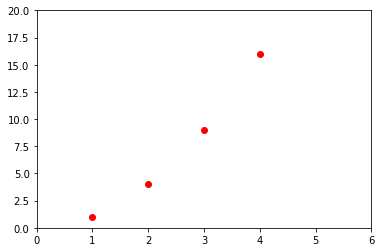

In [8]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
# 指定 x 轴显示区域为 0-6，y 轴为 0-20
plt.axis([0,6,0,20])
plt.show()

### 使用 plt.plot() 的返回值来设置线条属性

`plot` 函数返回一个 `Line2D` 对象组成的列表，每个对象代表输入的一对组合，例如：

- line1, line2 为两个 Line2D 对象

    `line1, line2 = plt.plot(x1, y1, x2, y2)`

- 返回 3 个 Line2D 对象组成的列表

    `lines = plt.plot(x1, y1, x2, y2, x3, y3)`

我们可以使用这个返回值来对线条属性进行设置：

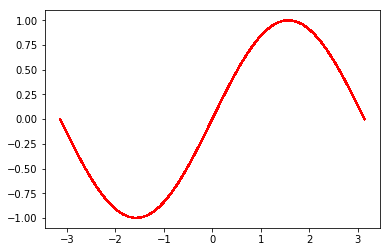

In [30]:
# 加逗号 line 中得到的是 line2D 对象，不加逗号得到的是只有一个 line2D 对象的列表
line, = plt.plot(x, y, 'r-')

# 将抗锯齿关闭
line.set_antialiased(False)

plt.show()

### plt.setp() 修改线条性质

更方便的做法是使用 `plt` 的 `setp` 函数：

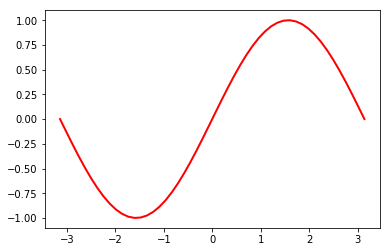

In [31]:
lines = plt.plot(x, y)

# 使用键值对
plt.setp(lines, color='r', linewidth=2.0)

# 或者使用 MATLAB 风格的字符串对
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

plt.show()

可以设置的属性有很多，可以使用 `plt.setp(lines)` 查看 `lines` 可以设置的属性，各属性的含义可参考 `matplotlib` 的文档。

In [13]:
plt.setp(lines)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  antialiased: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth: float
  marker: unknown
  markeredgecolor: color
  markeredgewidth: float
  markerfacecolor: color
  markerfacecoloralt: color
  markersize: float
  markevery: unknown
  path_effects: `.AbstractPathEffect`
  picker: float or callable[[Arti

## 子图

`figure()` 函数会产生一个指定编号为 `num` 的图：

    plt.figure(num)

这里，`figure(1)` 其实是可以省略的，因为默认情况下 `plt` 会自动产生一幅图像。

使用 `subplot` 可以在一副图中生成多个子图，其参数为：

    plt.subplot(numrows, numcols, fignum)

当 `numrows * numcols < 10` 时，中间的逗号可以省略，因此 `plt.subplot(211)` 就相当于 `plt.subplot(2,1,1)`。

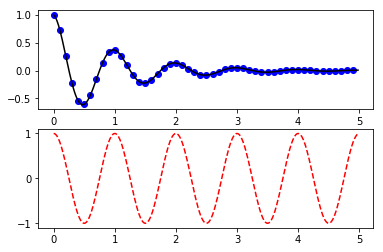

In [44]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot( t1, f(t1), 'bo',t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## 图形上加上文字

`plt.hist()` 可以用来画直方图。

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


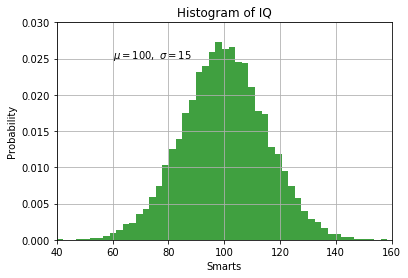

In [15]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

对于这幅图形，我们使用 `xlabel` ，`ylabel`，`title`，`text` 方法设置了文字，其中：

- `title` ：图形标题

- `text` ：在指定位置放入文字

输入特殊符号支持使用 `Tex` 语法，用 `$<some Tex code>$` 隔开。

除了使用 `text` 在指定位置标上文字之外，还可以使用 `annotate` 函数进行注释，`annotate` 主要有两个参数：

- `xy` ：注释位置 
- `xytext` ：注释文字位置

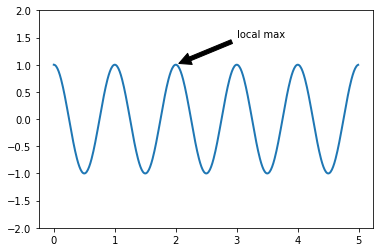

In [16]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()